<a href="https://colab.research.google.com/github/pooriaazami/deep_learning_class_notebooks/blob/main/24_Double_Deep_Q_Learning_1_gym_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install -q pyvirtualdisplay
!pip install -q swig
!pip install -q gymnasium[all]

  Preparing metadata (setup.py) ... done


In [117]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

import random
from collections import namedtuple, deque

from IPython.display import clear_output

In [28]:
env = gym.make("LunarLander-v2", render_mode="rgb_array")

In [29]:
observation, info = env.reset()

In [32]:
observation

array([-0.00484533,  1.408985  , -0.4908019 , -0.08600599,  0.00562137,
        0.11117391,  0.        ,  0.        ], dtype=float32)

In [57]:
env.action_space.sample()

1

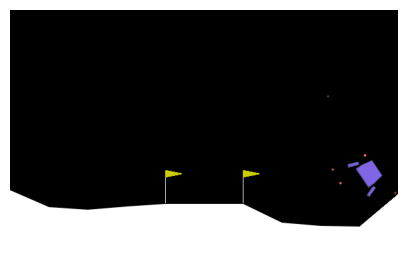

In [52]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

for _ in range(100):
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

    axs.imshow(env.render())
    axs.axis('off')
    plt.pause(.01)

env.close()

In [62]:
MemoryBlock = namedtuple('MemoryBlock', ('current', 'action', 'reward', 'next'))

In [64]:
block = MemoryBlock(1, 1, 2, 1)

In [68]:
block.action

1

In [80]:
memory = deque(maxlen=10)

In [81]:
memory

deque([])

In [82]:
memory.append(100)

In [83]:
memory

deque([100])

In [84]:
for i in range(10):
  memory.append(i)
  print(memory)

deque([100, 0], maxlen=10)
deque([100, 0, 1], maxlen=10)
deque([100, 0, 1, 2], maxlen=10)
deque([100, 0, 1, 2, 3], maxlen=10)
deque([100, 0, 1, 2, 3, 4], maxlen=10)
deque([100, 0, 1, 2, 3, 4, 5], maxlen=10)
deque([100, 0, 1, 2, 3, 4, 5, 6], maxlen=10)
deque([100, 0, 1, 2, 3, 4, 5, 6, 7], maxlen=10)
deque([100, 0, 1, 2, 3, 4, 5, 6, 7, 8], maxlen=10)
deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], maxlen=10)


In [87]:
env = gym.make("LunarLander-v2", render_mode="rgb_array")
observation, info = env.reset()

memory = deque(maxlen=150)

for _ in range(100):
    action = env.action_space.sample()  # agent policy that uses the observation and info

    current = observation.copy()
    observation, reward, terminated, truncated, info = env.step(action)
    block = MemoryBlock(current, action, reward, observation)
    memory.append(block)

    if terminated or truncated:
        observation, info = env.reset()


env.close()

In [96]:
b1 = memory[0]
b2 = memory[1]

In [97]:
b1

MemoryBlock(current=array([ 0.0032485 ,  1.4054555 ,  0.32901463, -0.24287517, -0.00375733,
       -0.07452664,  0.        ,  0.        ], dtype=float32), action=0, reward=-1.3044605623392442, next=array([ 0.006497  ,  1.3994141 ,  0.32857022, -0.26852667, -0.00744009,
       -0.07366162,  0.        ,  0.        ], dtype=float32))

In [98]:
b2

MemoryBlock(current=array([ 0.006497  ,  1.3994141 ,  0.32857022, -0.26852667, -0.00744009,
       -0.07366162,  0.        ,  0.        ], dtype=float32), action=2, reward=-1.3291067603536988, next=array([ 0.00991163,  1.3933325 ,  0.34438816, -0.2703012 , -0.01033648,
       -0.05793293,  0.        ,  0.        ], dtype=float32))

In [115]:
batch = MemoryBlock(*zip(*memory))

In [116]:
batch.current

(array([ 0.0032485 ,  1.4054555 ,  0.32901463, -0.24287517, -0.00375733,
        -0.07452664,  0.        ,  0.        ], dtype=float32),
 array([ 0.006497  ,  1.3994141 ,  0.32857022, -0.26852667, -0.00744009,
        -0.07366162,  0.        ,  0.        ], dtype=float32),
 array([ 0.00991163,  1.3933325 ,  0.34438816, -0.2703012 , -0.01033648,
        -0.05793293,  0.        ,  0.        ], dtype=float32),
 array([ 0.01323576,  1.3866549 ,  0.33303937, -0.29678914, -0.01095505,
        -0.0123724 ,  0.        ,  0.        ], dtype=float32),
 array([ 0.01642313,  1.3809104 ,  0.32008106, -0.25532517, -0.01228218,
        -0.02654489,  0.        ,  0.        ], dtype=float32),
 array([ 0.0196105 ,  1.3745655 ,  0.32008517, -0.28200608, -0.01360798,
        -0.02651851,  0.        ,  0.        ], dtype=float32),
 array([ 0.02286119,  1.3676276 ,  0.32800844, -0.30837443, -0.01652008,
        -0.05824757,  0.        ,  0.        ], dtype=float32),
 array([ 0.0260045 ,  1.3614005 ,  0.3178

In [119]:
s = random.sample(memory, 10)
batch = MemoryBlock(*zip(*s))

In [120]:
batch.reward

(0.7480714012465353,
 -0.6803533446248753,
 3.16454145519175,
 -0.4614322955537659,
 -1.2174461058552595,
 0.24074994760946994,
 -0.9185988699621135,
 -0.9376932553099369,
 -0.575740884578579,
 -0.37997100287804986)